# Корреляция и регрессия

Булыгин Олег:  
* [LinkedIn](linkedin.com/in/obulygin)  
* [Мой канал в ТГ по Python](https://t.me/pythontalk_ru)
* [Чат канала](https://t.me/pythontalk_chat)
* [Блог в Телетайпе](https://teletype.in/@pythontalk)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# нужный датасет встроен в библиотеку sklearn
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
data

In [ ]:
target

In [ ]:
# добавляем target в сами данные
df = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

df['MEDV'] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Содержит информацию о жилье в Бостоне, собранную бюро переписи населения США. Она была получена из архива StatLib и широко использовалась в литературе для оценки алгоритмов.

- CRIM - уровень преступности на душу населения
- ZN - доля земли под жилую застройку,
- INDUS - доля акров, не относящихся к розничной торговле.
- CHAS - фиктивная переменная реки Чарльз (1, если участок ограничивает реку; 0 в противном случае)
- NOX - концентрация оксидов азота
- RM - среднее количество комнат в доме
- AGE - доля занимаемых владельцами единиц, построенных до 1940 г.
- DIS - взвешенное расстояние до пяти бостонских центров занятости
- RAD - индекс доступности радиальных автомобильных дорог
- TAX - полная ставка налога на имущество за 10 000 долларов США.
- PTRATIO - соотношение учеников и учителей по городам
- B - 1000 (Bk - 0,63) ^ 2, где Bk - доля афроамериканцев по городам
- LSTAT - % более населения низкого соц статуса
- MEDV - Средняя стоимость домов в 1000 долларов

## Корреляция

<Axes: xlabel='CRIM', ylabel='MEDV'>

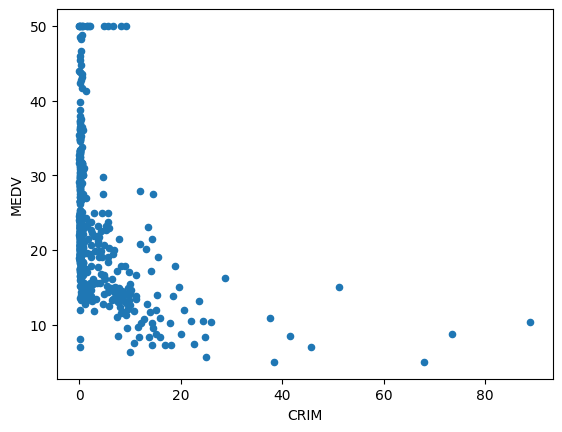

In [ ]:
# визуализируем взаимосвязь преступности и цены дома
df.plot(kind='scatter', x='CRIM', y='MEDV')

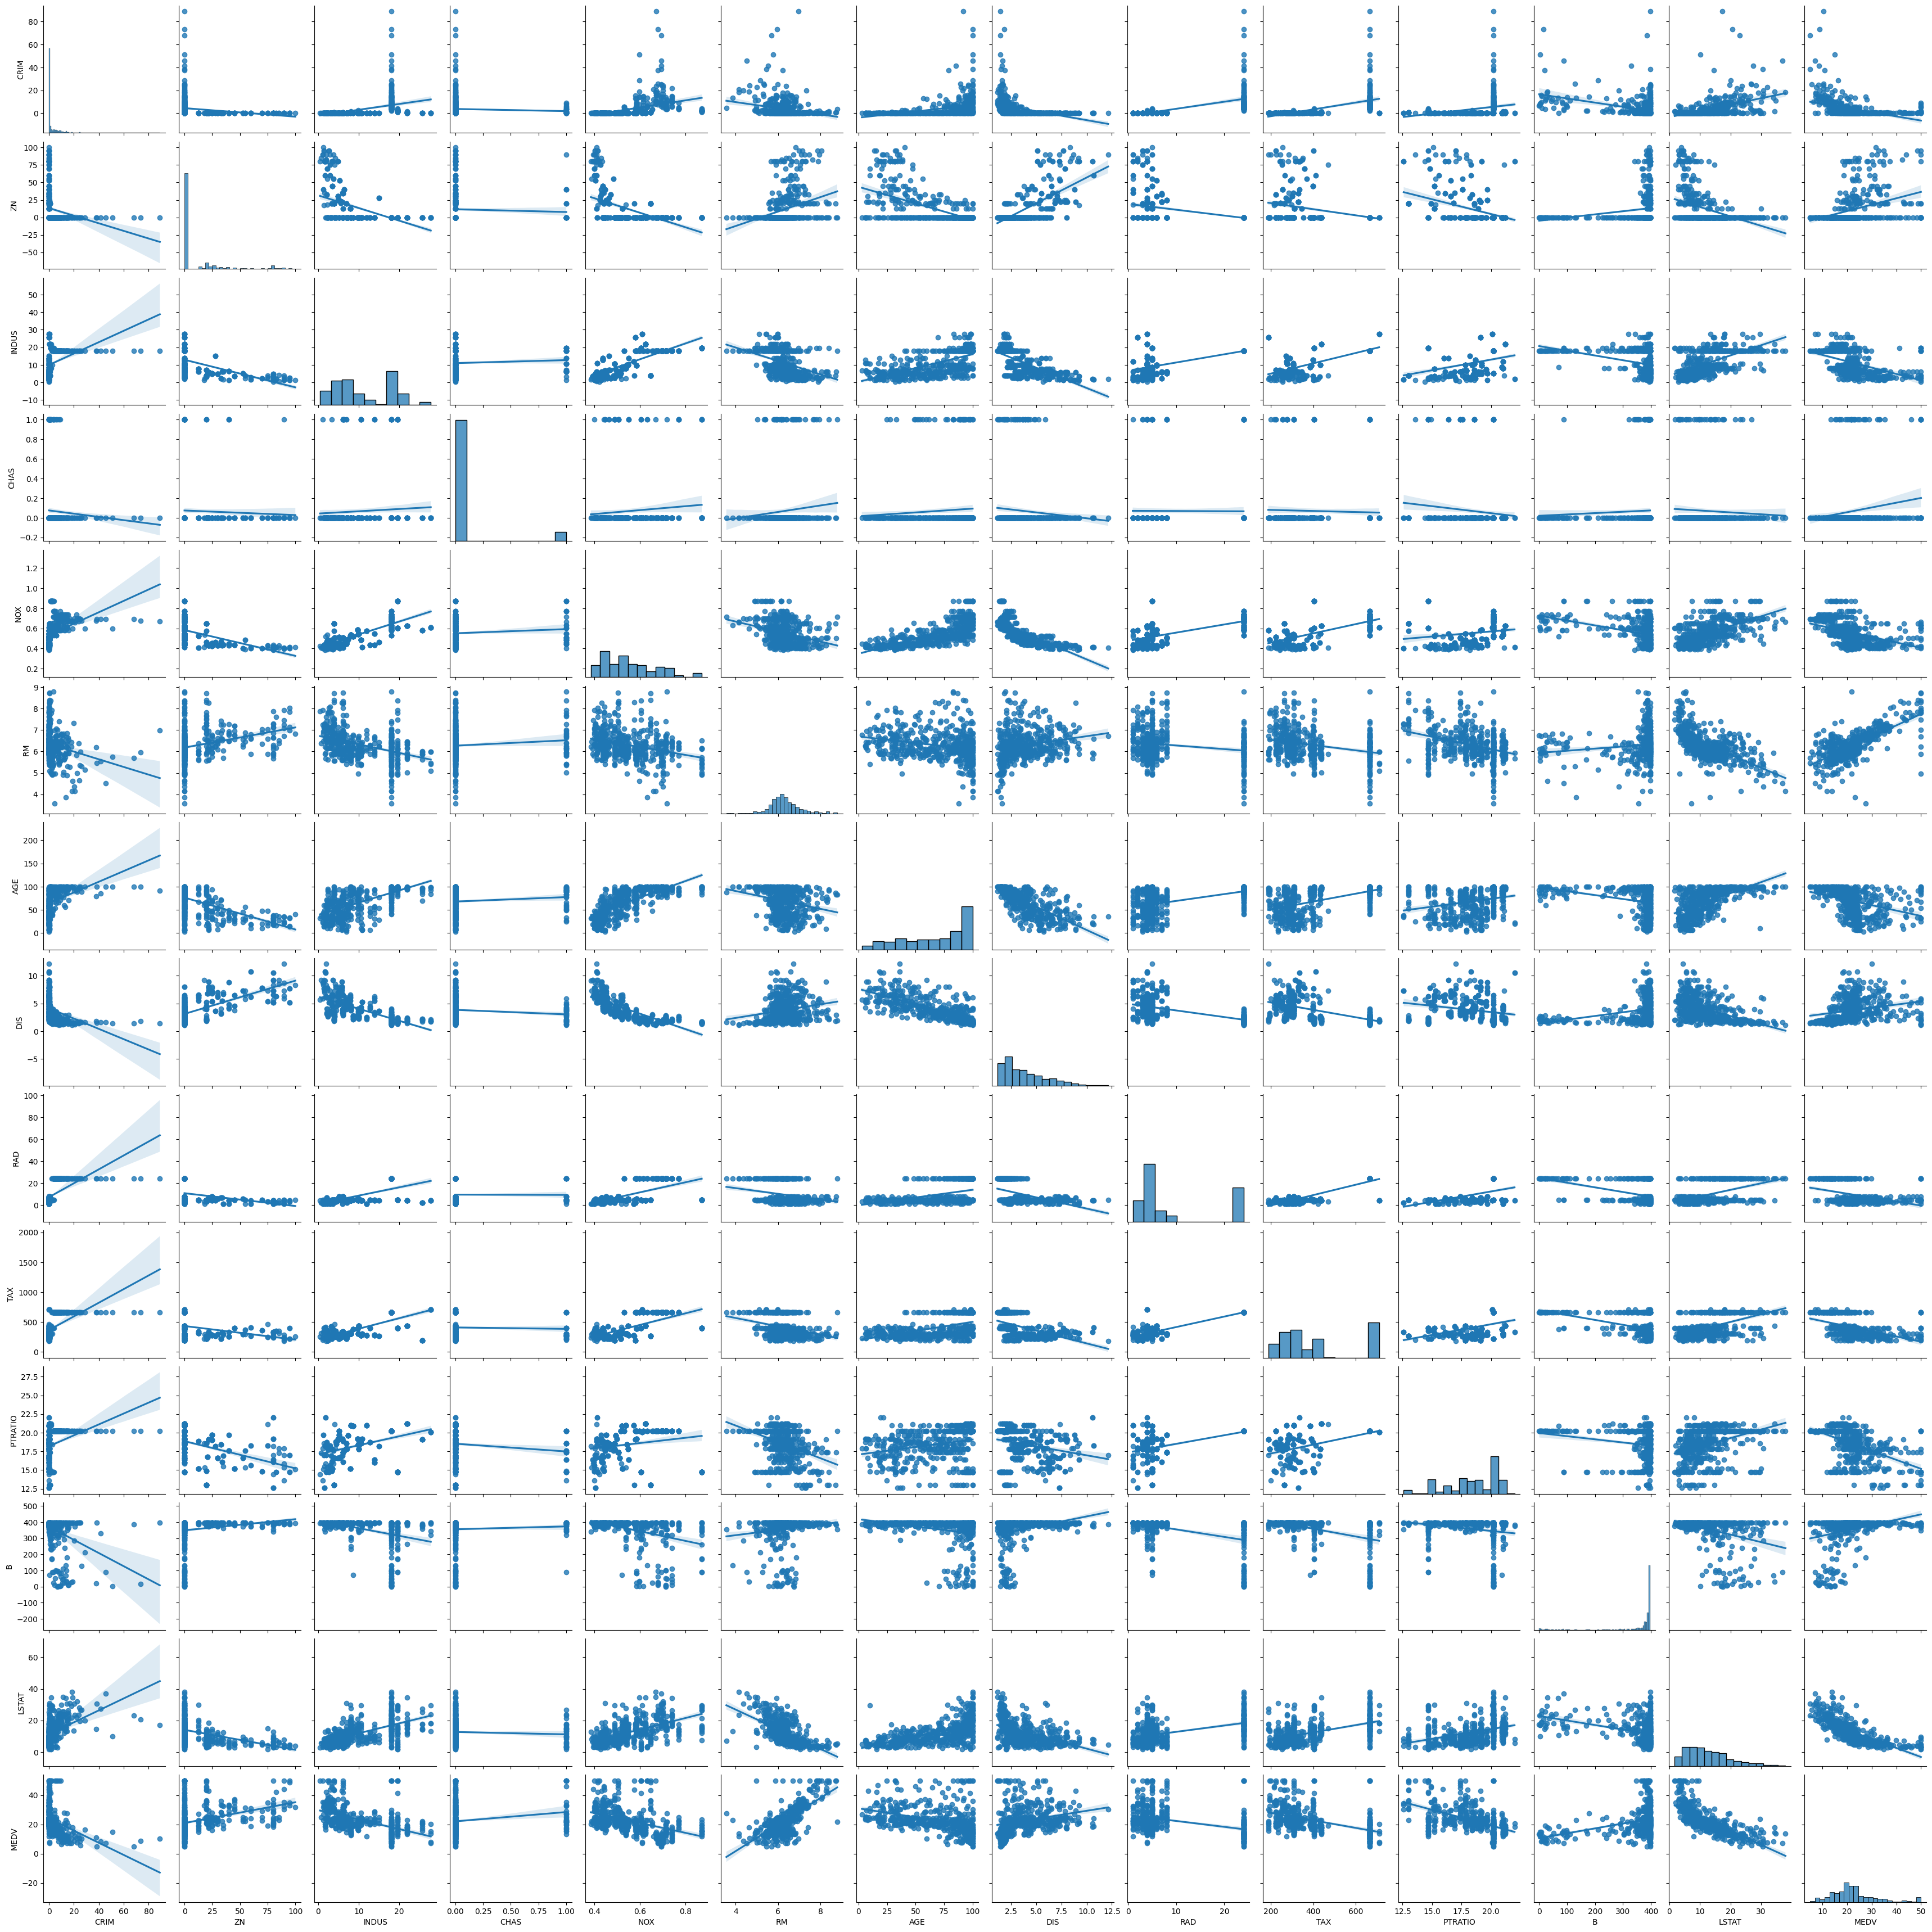

In [ ]:
# можем использовать pairplot для изучения взаимосвязи между множеством признаков
sns.pairplot(df, kind='reg')

In [ ]:
# изучаем взаимосвязь между населением низкого соц. статуса и количеством комнат в доме
df.plot(kind='scatter', x='LSTAT', y='RM')

<Axes: xlabel='RM', ylabel='MEDV'>

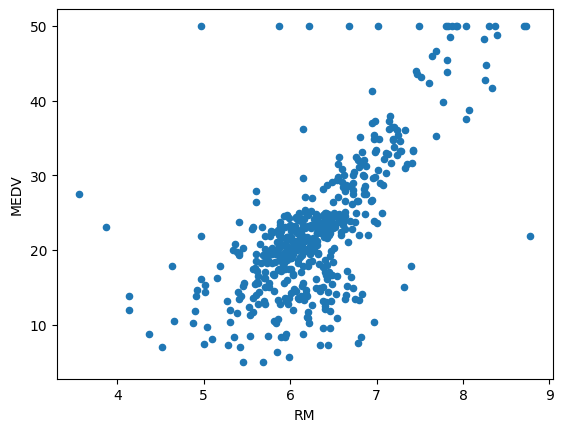

In [ ]:
# изучаем взаимосвязь между ценой и количеством комнат в доме
df.plot(kind='scatter', x='RM', y='MEDV')

In [ ]:
# считаем коэф. корреляции Пирсона
df[['RM', 'MEDV']].corr()

,RM,MEDV
RM,1.00000,0.69536
MEDV,0.69536,1.00000


In [ ]:
# считаем коэф. корреляции Спирмана
df[['RM', 'MEDV']].corr(method='spearman')

,RM,MEDV
RM,1.000000,0.633576
MEDV,0.633576,1.000000


In [ ]:
# считаем коэф. корреляции Кенделла
df[['RM', 'MEDV']].corr(method='kendall')

,RM,MEDV
RM,1.000000,0.482829
MEDV,0.482829,1.000000


In [ ]:
# можем посчитать коэффициенты корреляции между всеми показателями
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

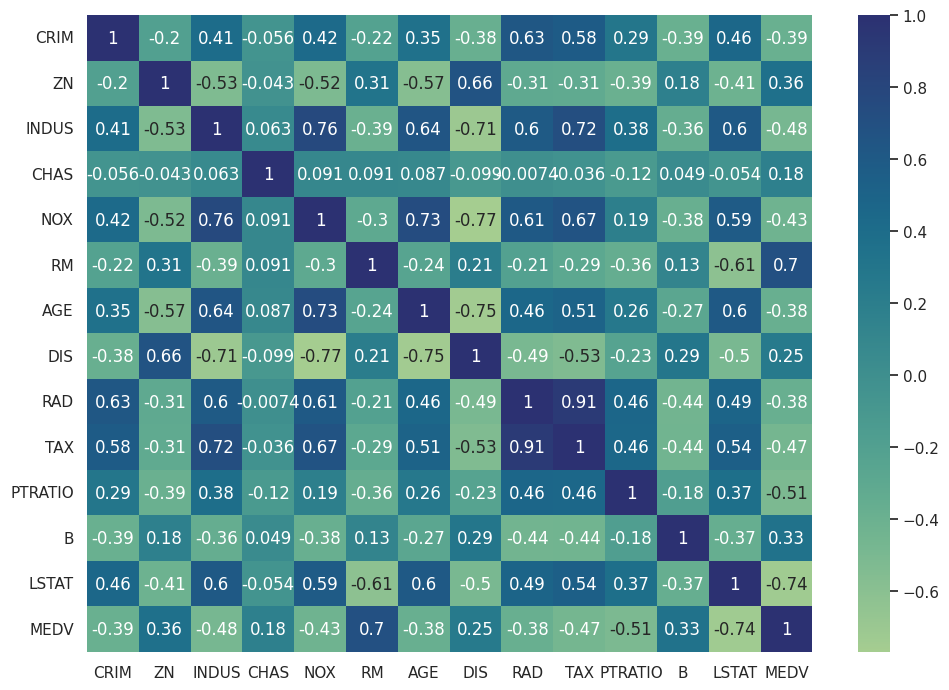

In [ ]:
# удобно визуализировать при помощи тепловой карты
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(df.corr(), annot=True, cmap='crest')

In [ ]:
np.corrcoef(df['RM'], df['MEDV'])

array([[1.        , 0.69535995],
       [0.69535995, 1.        ]])

## Регрессия

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'LSTAT']]
y = df['MEDV']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [ ]:
model.coef_

array([-0.11907869, -7.43586544,  5.31615891, -0.02369166, -1.11925847,
       -0.0686104 , -0.58765394])

In [ ]:
model.intercept_

7.702146986393458

In [ ]:
# y = -0.43 * x + 24.4

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([27.3975959 , 32.60599214, 19.6427209 , 27.24178432, 18.64914109,
       24.14298774, 17.56614915, 17.35565885, 21.55222442, 21.84883612,
       18.9057397 , 15.89841139, -6.4777844 , 23.09723507, 20.06056052,
       26.75474849, 19.64047262,  2.94421755, 37.32739209, 16.99942432,
       27.98359261, 28.9339154 , 13.41558456, 28.32086186, 18.22701131,
       13.96467209, 24.07241316, 19.36980008, 18.78483703, 20.51413871,
       19.53681692, 27.28282934, 25.9173131 , 17.77532369, 15.48835815,
       17.54702093, 32.89558259, 22.01519447, 21.252631  , 27.03718422,
       14.27763133, 30.46382305, 38.86469787, 18.27170459, 27.8326689 ,
       15.88346205, 16.32447289, 28.43672002, 19.05145819, 29.53705296,
       18.66201878, 31.65549721, 18.30771056, 30.13446998, 36.41313908,
       22.92380705, 18.57717075, 32.49676596, 25.97671258, 12.37646782,
       24.17399926, 29.8185099 , 31.69026452, 20.3505329 , 23.27276251,
       11.87401422, 19.93245165, 27.00141778, 30.270173  , 15.82

In [ ]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
418     8.8
117    19.2
42     25.3
322    20.4
347    23.1
Name: MEDV, Length: 127, dtype: float64

In [ ]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.5896814006596203

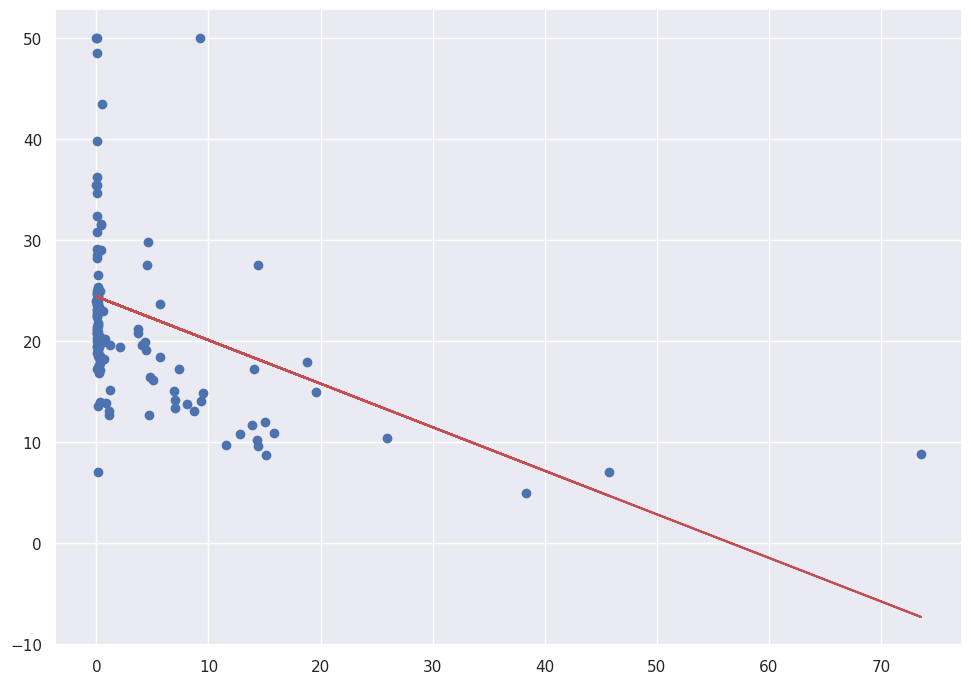

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [ ]:
# Альтернативный способ из statsmodel

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу

In [ ]:
X_const

,const,CRIM,NOX,RM,AGE,DIS,RAD,LSTAT
5,1.0,0.02985,0.458,6.430,58.7,6.0622,3.0,5.21
116,1.0,0.13158,0.547,6.176,72.5,2.7301,6.0,12.04
45,1.0,0.17142,0.448,5.682,33.8,5.1004,3.0,10.21
16,1.0,1.05393,0.538,5.935,29.3,4.4986,4.0,6.58
468,1.0,15.57570,0.580,5.926,71.0,2.9084,24.0,18.13
...,...,...,...,...,...,...,...,...
106,1.0,0.17120,0.520,5.836,91.9,2.2110,5.0,18.66
270,1.0,0.29916,0.464,5.856,42.1,4.4290,3.0,13.00
348,1.0,0.01501,0.435,6.635,29.7,8.3440,4.0,5.99
435,1.0,11.16040,0.740,6.629,94.6,2.1247,24.0,23.27


In [ ]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     105.2
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           9.32e-82
Time:                        18:31:33   Log-Likelihood:                -1092.7
No. Observations:                 354   AIC:                             2201.
Df Residuals:                     346   BIC:                             2232.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1089      4.719      1.930      0.0

In [ ]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

In [ ]:
prstd, iv_l, iv_u = wls_prediction_std(results)
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

Text(0, 0.5, 'Остатки')

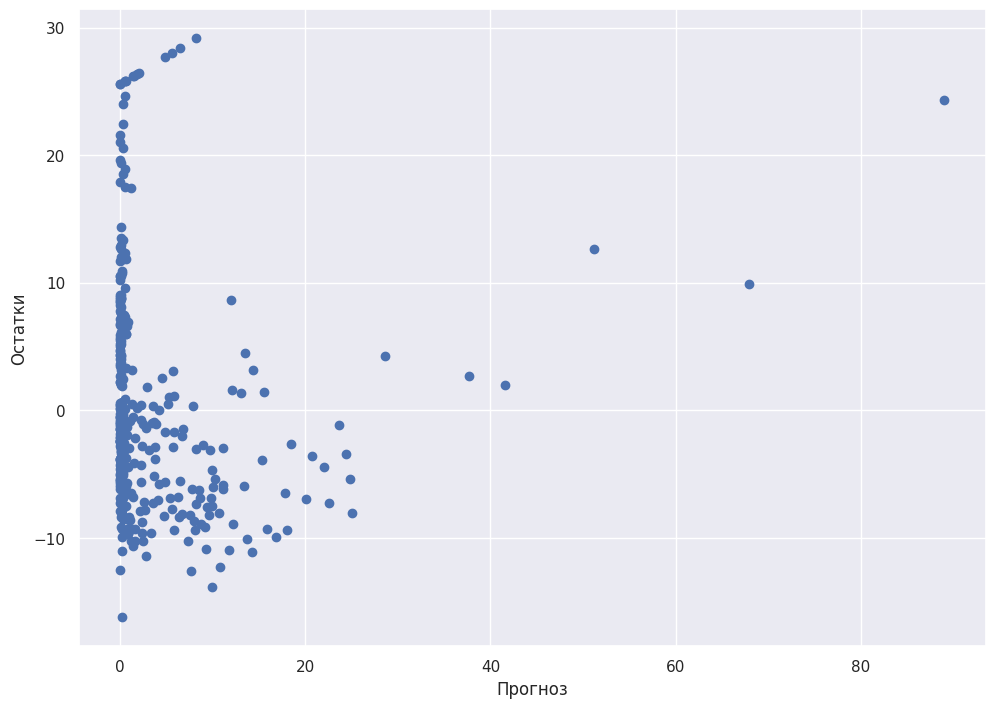

In [ ]:
# посмотрим на остатки
plt.scatter(x=X_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

(array([ 1.,  1.,  0.,  3.,  9., 37., 86., 86., 60., 21., 16., 11.,  9.,
         9.,  0.,  1.,  2.,  0.,  0.,  2.]),
 array([-17.83567628, -15.56146608, -13.28725589, -11.01304569,
         -8.73883549,  -6.4646253 ,  -4.1904151 ,  -1.9162049 ,
          0.35800529,   2.63221549,   4.90642569,   7.18063589,
          9.45484608,  11.72905628,  14.00326648,  16.27747667,
         18.55168687,  20.82589707,  23.10010726,  25.37431746,
         27.64852766]),
 <BarContainer object of 20 artists>)

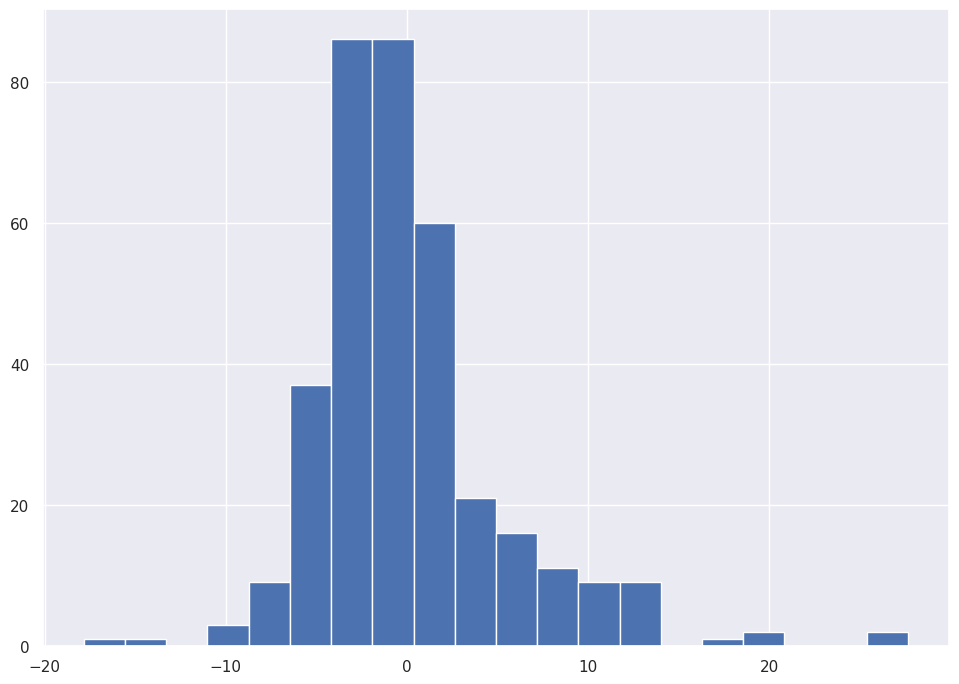

In [ ]:
plt.hist(results.resid, bins=20)